#                                               Projeto WPT

### Diagrama do modelo eletrodinâmico do circuito WPT

### Modelo Numérico

Módulos Utilizados

In [33]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

Variáveis do Sistema: $R_1=0,5\Omega$, $R_2=0,5\Omega$, $L_1=300 mH$, $L_2=300 mH$, $C_1 = 1\mu F$, $C_2 = 1\mu F$ e $k=0,5$

In [34]:
# Implementação Variáveis
R_1 = 0.5
R_2= R_1
L_1 = 300e-3
L_2 = L_1
C_1 = 1e-6
C_2 = C_1
V1 = 5
Lista_K = np.arange(0,1,0.05)
RC= 10

In [35]:
#Adotando W referencial para descobrir a frequencia quando M tende a 0
W_ref = (1/(L_1*C_1))**(0.5)
#Cálculo da Frequência Referente
F_ref = W_ref/(2*np.pi)

Lista_Frequencias =  np.arange(F_ref,F_ref*1.3, 1)

In [36]:
def CalcularTransformador(R_1,R_2,Z_L1,Z_L2,Z_C1,Z_C2,Z_EQ,ZM,V1):
    Z=np.array([[R_1+Z_L1+Z_C1, -ZM],
                [-ZM, Z_L2+R_2+Z_EQ]])
    V=np.array([V1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [37]:
def devolve_correntes(f,k,R_1,R_2,L_1,L_2,C_1,C_2,V1,RC):
    M = k*np.sqrt(L_1*L_2)
    w = np.pi*2*f
    Z_L1 = 0 + w*L_1*1j
    Z_L2 = 0 + w*L_2*1j
    Z_C1 = 0 - (1/(w*C_1))*1j
    Z_C2 = 0 - (1/(w*C_2))*1j
    Z_EQ = (RC/(RC*C_2*w*1j+1))
    ZM = 0 + (w*M)*1j
    I1,I2 = CalcularTransformador(R_1,R_2,Z_L1,Z_L2,Z_C1,Z_C2,Z_EQ,ZM,V1)
    return I1,I2
    

In [38]:
def acha_I1_I2(k):
    #Calculo da Indutância Mútua

    Lista_I1 = []
    Lista_I2 = []
    #Loop para achar diferentes valores de I1 e I2
    for f in Lista_Frequencias:
        I1,I2 = devolve_correntes(f,k,R_1,R_2,L_1,L_2,C_1,C_2,V1,RC)
        Lista_I1.append(np.abs(I1))
        Lista_I2.append(np.abs(I2))

    return Lista_I1,Lista_I2


In [39]:
def annot_max(x,y, ax=None):
    xmax = max(x)
    ymax = max(y)
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

### Gráficos das Correntes x Frequência


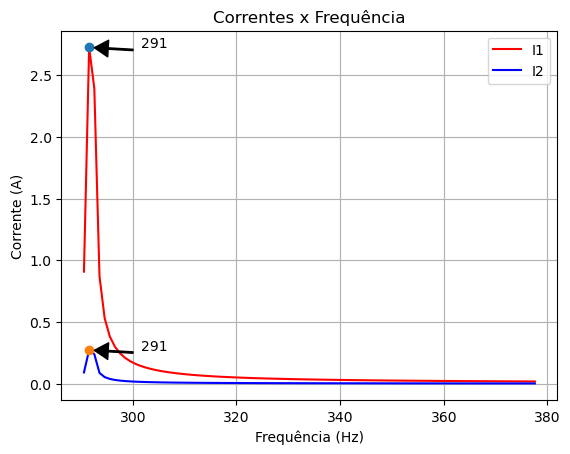

In [47]:
I1,I2 = acha_I1_I2(0.1)

I1max, I2max = max(I1), max(I2)
indexI1, indexI2 = list(I1).index(I1max), list(I2).index(I2max)


fmax1,fmax2 = Lista_Frequencias[indexI1],Lista_Frequencias[indexI2]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Lista_Frequencias,I1,'r', label = ("I1"))
plt.plot(Lista_Frequencias,I2,'b', label = ("I2"))
plt.plot(fmax1,I1max, "-o")
plt.plot(fmax2,I2max, "-o")
ax.annotate(f'{int(fmax1)}', xy=(fmax1, I1max), xytext=(fmax1+10, I1max),
            arrowprops=dict(facecolor='black', shrink=0.1,width=1,headlength=10),
            )
ax.annotate(f'{int(fmax2)}', xy=(fmax2, I2max), xytext=(fmax2+10, I2max),
            arrowprops=dict(facecolor='black', shrink=0.1,width=1,headlength=10),
            )
plt.legend()
plt.title('Correntes x Frequência')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.grid(True)
plt.show()


Variando a constante de acoplamento K com frequencia fixada em 335:

In [64]:
Frequencia = 300
lista_I1 = []
lista_I2 = []
for k in Lista_K:
    I1,I2 = devolve_correntes(Frequencia,k,R_1,R_2,L_1,L_2,C_1,C_2,V1,RC)
    lista_I1.append(np.abs(I1))
    lista_I2.append(np.abs(I2))
    

    

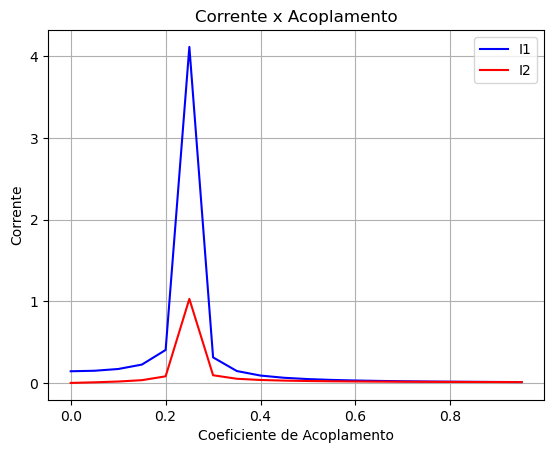

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Lista_K,lista_I1,'b',label = ("I1"))
plt.plot(Lista_K,lista_I2,'r',label = ("I2"))
plt.legend()
plt.title('Corrente x Acoplamento')
plt.ylabel("Corrente")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

### Gráficos das Potências

### Gráfico Eficiência x Frequência

### Gráfico Tensão na Carga x K